In [62]:
import pandas as pd
import numpy as np
import json

In [63]:
df1=pd.read_csv(r'C:\Users\lenovo\Desktop\ironhack\FINAL PROJECT\french-box-office\data\box_office_2010s.csv')

In [64]:
df2=pd.read_csv(r'C:\Users\lenovo\Desktop\ironhack\FINAL PROJECT\french-box-office\data\featuresVFinal.csv')

In [65]:
df1.shape

(3959, 13)

In [66]:
df1.columns

Index(['global_rank', 'title', 'id', 'release_date', 'day', 'month', 'year',
       'max_theaters_used', 'first_day_sales', 'first_weekend_sales',
       'first_week_sales', 'total_sales', 'viewers_by_theaters'],
      dtype='object')

In [67]:
df2.columns

Index(['Unnamed: 0', 'tmdb_id', 'budget', 'imdb_id', 'original_language',
       'original_title', 'tmdb_popularity', 'runtime', 'tagline', 'title',
       'tmdb_vote_count', 'tmdb_vote_average', 'cast1', 'cast1_popularity',
       'cast2', 'cast2_popularity', 'cast3', 'cast3_popularity'],
      dtype='object')

In [68]:
df2.head()

,Unnamed: 0,tmdb_id,budget,imdb_id,original_language,original_title,tmdb_popularity,runtime,tagline,title,tmdb_vote_count,tmdb_vote_average,cast1,cast1_popularity,cast2,cast2_popularity,cast3,cast3_popularity
0,0,141614.0,0.0,tt1856053,fi,Niko 2: Lentäjäveljekset,14.757,77.0,La suite des aventures du petit renne.,"Niko, le petit renne 2",41.0,5.8,Kari Hietalahti,2.764,Juha Veijonen,2.784,Kari Ketonen,4.396
1,1,10315.0,40000000.0,tt0432283,en,Fantastic Mr. Fox,26.954,88.0,NaN,Fantastic Mr. Fox,4020.0,7.8,George Clooney,16.481,Meryl Streep,17.845,Jason Schwartzman,17.826
2,2,152601.0,23000000.0,tt1798709,en,Her,28.967,126.0,Une love story de Spike Jonze,Her,12009.0,7.9,Joaquin Phoenix,16.746,Scarlett Johansson,39.263,Amy Adams,17.316
3,3,56623.0,0.0,tt1526578,fr,"Ao, le dernier néandertal",9.696,84.0,Son destin va vous bouleverser,"Ao, le dernier Néandertal",43.0,5.8,Helmi Dridi,1.746,Vesela Kazakova,1.819,Aruna Shields,1.705
4,4,125623.0,0.0,tt2073016,fr,Le Fils de l'autre,4.672,105.0,NaN,Le Fils de l'autre,68.0,6.5,Emmanuelle Devos,5.499,Pascal Elbé,1.620,Jules Sitruk,4.432


In [69]:
df=pd.merge(df1,df2,how='left',on='title')

In [70]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [71]:
df.to_csv(r'C:\Users\lenovo\Desktop\ironhack\FINAL PROJECT\french-box-office\data\dataset.csv')

In [72]:
df.loc[1,["cast1","cast1_popularity","cast2","cast2_popularity","cast3","cast3_popularity"]]=["Christian Clavier",6.732,"Chantal Lauby",11.612,"Ary Abittan",5.739]

In [73]:
df['cast_popularity']=df['cast1_popularity']+df['cast2_popularity']+df['cast3_popularity']

In [74]:
df.loc[df['cast1'].isna()==True].head(20)

,global_rank,title,id,release_date,day,month,year,max_theaters_used,first_day_sales,first_weekend_sales,...,tagline,tmdb_vote_count,tmdb_vote_average,cast1,cast1_popularity,cast2,cast2_popularity,cast3,cast3_popularity,cast_popularity
2,3,Star Wars: Le Réveil de la Force,13345,2015-12-16,16,12,2015,1093,619020.0,2705096.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Le Roi Lion (2019),17528,2019-07-17,17,7,2019,820,630478.0,2559370.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,La Reine des neiges 2,17530,2019-11-20,20,11,2019,1020,361818.0,1979782.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,Star Wars: Les derniers Jedi,15113,2017-12-13,13,12,2017,1027,503727.0,2188853.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,10,Avengers: Endgame,15189,2019-04-24,24,4,2019,633,692142.0,2844886.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,12,L'Âge de glace: La dérive des continents,11379,2012-06-27,27,6,2012,841,402081.0,1466445.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,14,Harry Potter et les reliques de la mort - part...,10193,2011-07-13,13,7,2011,833,732206.0,2532629.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,15,Harry Potter et les reliques de la mort - part...,9839,2010-11-24,24,11,2010,1020,435069.0,2295310.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,16,Star Wars: L'Ascension de Skywalker,17224,2019-12-18,18,12,2019,795,392483.0,1886610.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,17,Les Indestructibles 2,17342,2018-07-04,4,7,2018,890,694361.0,1516963.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
df.head()

,global_rank,title,id,release_date,day,month,year,max_theaters_used,first_day_sales,first_weekend_sales,...,tagline,tmdb_vote_count,tmdb_vote_average,cast1,cast1_popularity,cast2,cast2_popularity,cast3,cast3_popularity,cast_popularity
0,1,Intouchables,12364,2011-11-02,2,11,2011,898,191342.0,1653303.0,...,"Parfois, vous devez entrer dans le monde de qu...",14549.0,8.3,François Cluzet,6.028,Anne Le Ny,5.138,Clotilde Mollet,3.696,14.862
1,2,Qu'est-ce qu'on a fait au Bon Dieu ?,14040,2014-04-16,16,4,2014,821,200723.0,1150076.0,...,NaN,NaN,NaN,Christian Clavier,6.732,Chantal Lauby,11.612,Ary Abittan,5.739,24.083
2,3,Star Wars: Le Réveil de la Force,13345,2015-12-16,16,12,2015,1093,619020.0,2705096.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Le Roi Lion (2019),17528,2019-07-17,17,7,2019,820,630478.0,2559370.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Rien à déclarer,11191,2011-02-02,2,2,2011,1036,301089.0,2244226.0,...,NaN,952.0,5.8,Benoît Poelvoorde,4.237,Dany Boon,8.485,Julie Bernard,3.870,16.592


In [76]:
genres=pd.read_csv(r'C:\Users\lenovo\Desktop\ironhack\FINAL PROJECT\french-box-office\data\movie_genres.csv')

In [77]:
df=pd.merge(df,genres,how='left',on='tmdb_id')

In [79]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [83]:
df.drop(columns="tagline",inplace=True)

In [88]:
df[df['budget'].isna()==True][['title','tmdb_id','budget']].head(100)

,title,tmdb_id,budget
1,Qu'est-ce qu'on a fait au Bon Dieu ?,NaN,NaN
2,Star Wars: Le Réveil de la Force,NaN,NaN
3,Le Roi Lion (2019),NaN,NaN
9,La Reine des neiges 2,NaN,NaN
10,Star Wars: Les derniers Jedi,NaN,NaN
...,...,...,...
223,Mad Max: Fury Road,NaN,NaN
227,Les Croods,NaN,NaN
228,Transformers : l'âge de l'extinction,NaN,NaN
232,Les Pingouins de Madagascar,NaN,NaN


In [84]:
df.isna().sum()

global_rank               0
title                     0
id                        0
release_date              0
day                       0
month                     0
year                      0
max_theaters_used         0
first_day_sales         152
first_weekend_sales     177
first_week_sales          0
total_sales               0
viewers_by_theaters       0
tmdb_id                1735
budget                 1735
imdb_id                1758
original_language      1735
original_title         1735
tmdb_popularity        1735
runtime                   0
tmdb_vote_count        1735
tmdb_vote_average      1735
cast1                  1770
cast1_popularity       1770
cast2                  1782
cast2_popularity       1782
cast3                  1794
cast3_popularity       1794
cast_popularity        1794
genre1                 1759
genre2                 2589
genre3                 3360
dtype: int64

In [80]:
df.describe()

,global_rank,id,day,month,year,max_theaters_used,first_day_sales,first_weekend_sales,first_week_sales,total_sales,...,tmdb_id,budget,tmdb_popularity,runtime,tmdb_vote_count,tmdb_vote_average,cast1_popularity,cast2_popularity,cast3_popularity,cast_popularity
count,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,3934.000000,3.909000e+03,4.086000e+03,4.086000e+03,...,2351.000000,2.351000e+03,2351.00000,2347.000000,2351.000000,2351.000000,2316.000000,2304.000000,2292.000000,2292.00000
mean,1942.454479,15025.635340,15.560940,6.519090,2014.648556,247.062653,35493.475089,1.607945e+05,1.942641e+05,5.225634e+05,...,269985.603148,1.744360e+07,23.98527,102.986366,1506.410464,6.235134,11.859725,10.030095,9.171497,31.18430
std,1151.706344,2568.637792,8.741498,3.510014,2.842729,218.779407,69361.695537,2.782613e+05,3.367276e+05,1.007830e+06,...,179054.609887,3.851772e+07,49.75602,20.997458,3141.382422,1.171018,10.765375,10.281795,10.666463,25.21657
min,1.000000,299.000000,1.000000,1.000000,2010.000000,0.000000,1.000000,3.600000e+01,0.000000e+00,3.500000e+01,...,775.000000,0.000000e+00,0.60000,0.000000,0.000000,0.000000,0.600000,0.600000,0.600000,1.80000
25%,933.250000,12868.250000,8.000000,3.000000,2012.000000,67.250000,3405.750000,1.705600e+04,2.065550e+04,4.963025e+04,...,88929.500000,0.000000e+00,4.50550,92.000000,54.000000,5.800000,3.772000,2.789000,2.077000,11.63400
50%,1934.500000,14927.500000,15.000000,7.000000,2015.000000,186.000000,11176.000000,5.841300e+04,7.044550e+04,1.516730e+05,...,270303.000000,0.000000e+00,9.37400,101.000000,255.000000,6.300000,8.666000,6.954000,6.009500,23.24800
75%,2937.750000,17234.750000,23.000000,10.000000,2017.000000,366.750000,34547.000000,1.728140e+05,2.095522e+05,5.151778e+05,...,414101.500000,1.500000e+07,21.87250,112.000000,1366.000000,6.900000,17.220000,14.511250,12.835250,46.30350
max,3959.000000,21624.000000,31.000000,12.000000,2019.000000,1205.000000,850297.000000,2.844886e+06,3.801235e+06,1.949069e+07,...,951576.000000,2.500000e+08,1578.54300,267.000000,31371.000000,10.000000,76.523000,114.181000,122.479000,183.08800


Text(0.5, 1.0, 'Frequency of release')

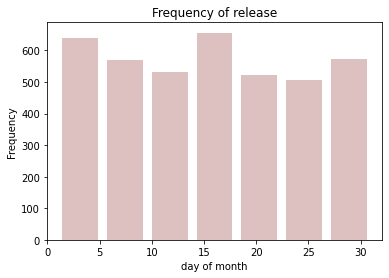

In [161]:
import matplotlib.pyplot as plt
plt.hist(df.day, bins = 7,  rwidth = .8, color = '#AA6666', alpha= .4)
plt.xlabel('day of month')
plt.ylabel('Frequency')
plt.title('Frequency of release')


Text(0, 0.5, 'Frequency')

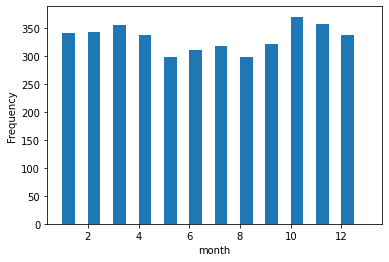

In [162]:
plt.hist(df.month, bins = 24, range = (1, 13))
plt.xlabel('month')
plt.ylabel('Frequency')

In [81]:
df['runtime']=df['runtime'].fillna(df['runtime'].mean())

<AxesSubplot:>

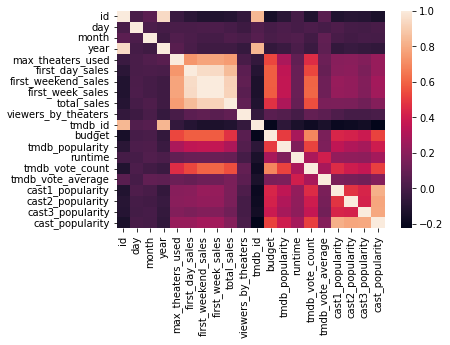

In [174]:
import seaborn as sns
sns.heatmap(df.corr())

In [168]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.
